# TMBD Box Office Revenue Prediction

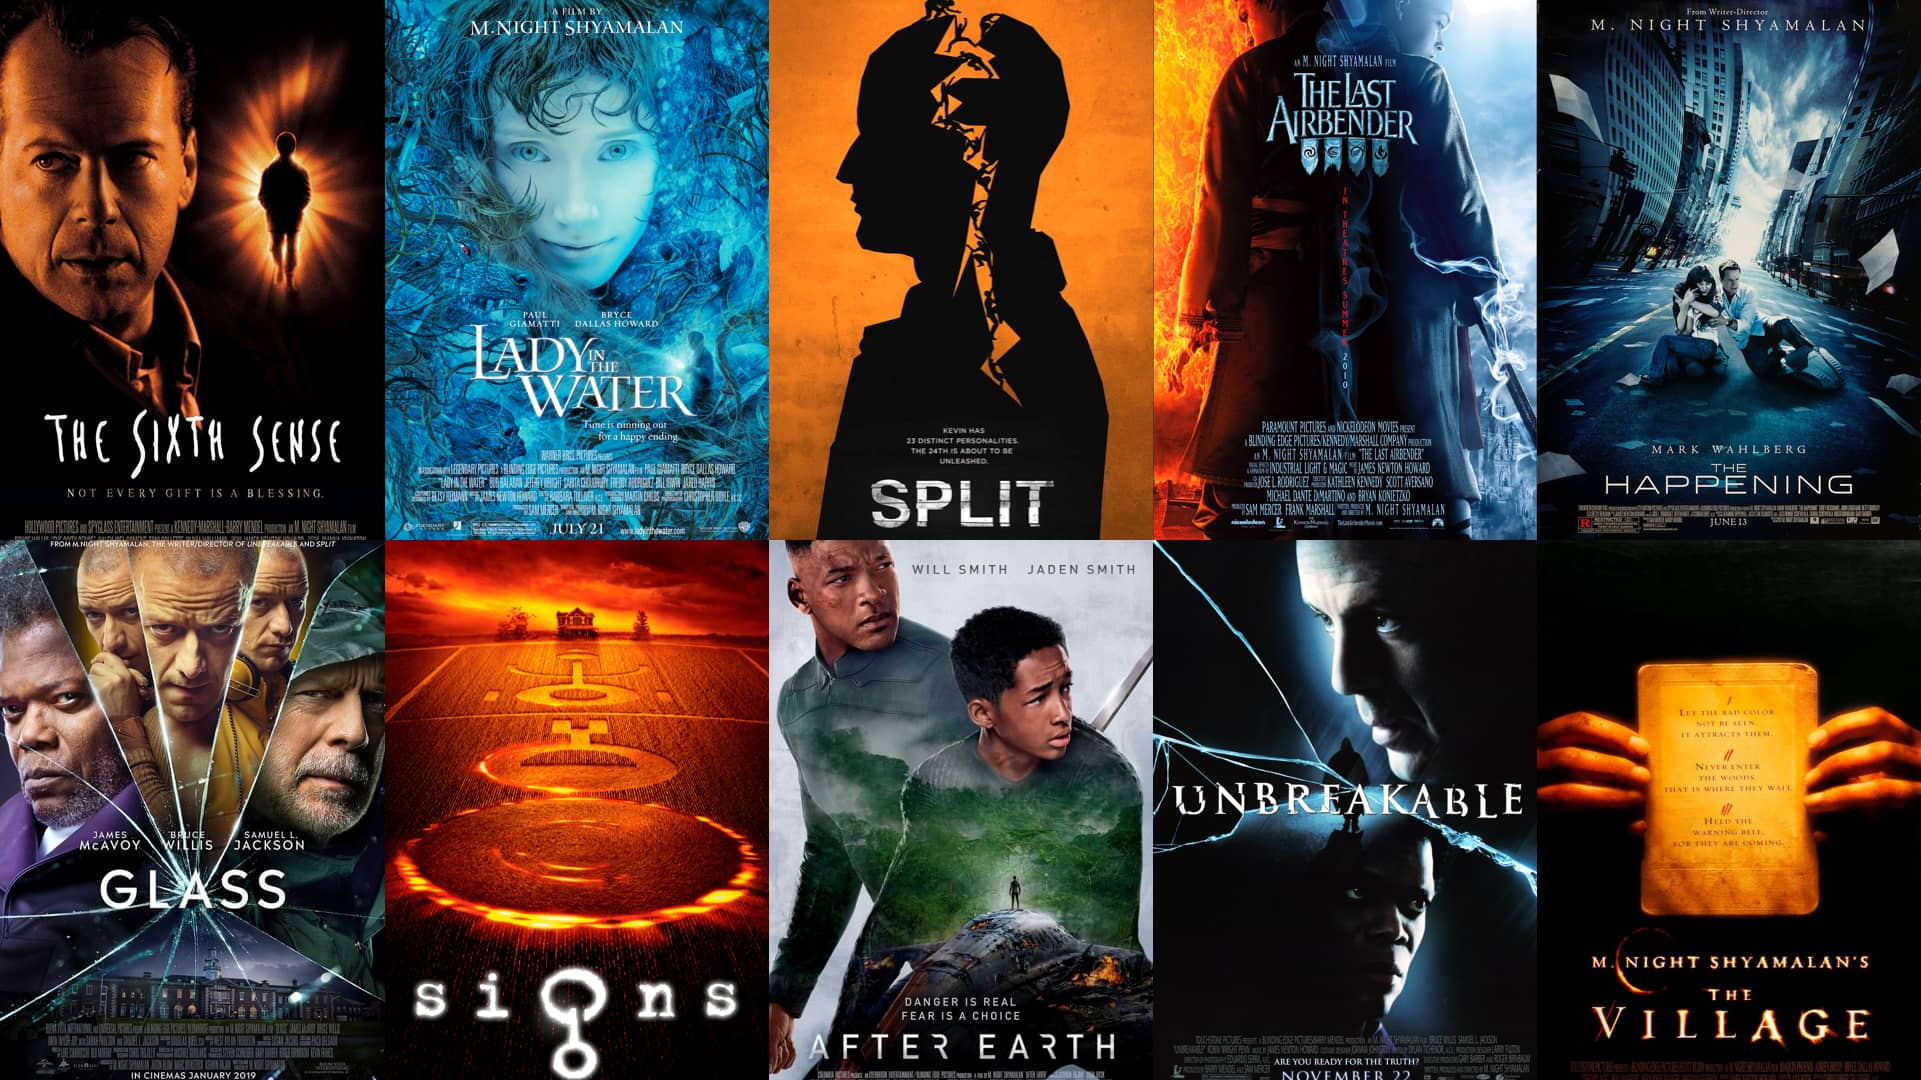

In [ ]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas_profiling
import seaborn as sns

In [ ]:
#importing the TMBD Training Dataset
Box_Office_data = pd.read_csv('../input/tmdb-box-office-prediction/train.csv')

In [ ]:
#Showing training Data
Box_Office_data.head()

In [ ]:
#importing test dataset 
Box_Office_data_test = pd.read_csv('../input/tmdb-box-office-prediction/test.csv')

In [ ]:
#Showing Test Data
Box_Office_data_test.head()

# Exploring Data

In [ ]:
Box_Office_data.info()

In [ ]:
Box_Office_data.describe()

In [ ]:
pandas_profiling.ProfileReport(Box_Office_data)

In [ ]:
#distribution of Budget, popularity, runtime and revenue
sns.set(rc={"figure.figsize": (12, 14)})
plt.subplot(2,2,1)
ax=sns.kdeplot(Box_Office_data['budget'].values, shade = True)
plt.title('Budget')
plt.subplot(2,2,2)
ax=sns.kdeplot(Box_Office_data['popularity'].values, shade=True)
plt.title('Popularity')
plt.subplot(2,2,3)
ax=sns.kdeplot(Box_Office_data['runtime'].values, shade = True)
plt.title('Runtime')
plt.subplot(2,2,4)
ax=sns.kdeplot(Box_Office_data['revenue'].values, shade = True)
plt.title('Revenue')
plt.show()

In [ ]:
#linear relationship between Budget and Revenue
f, ax = plt.subplots(figsize=(10, 12))
sns.regplot(x="budget", y="revenue", data=Box_Office_data, ax=ax, color = 'red');

In [ ]:
# Linear Relationship between Runtime and Revenue
f, ax = plt.subplots(figsize=(10, 12))
sns.regplot(x="runtime", y="revenue", data=Box_Office_data, ax = ax, color = 'green');

In [ ]:
#Linear relationship between Revenue and Popularity
f, ax = plt.subplots(figsize=(10, 12))
sns.regplot(x="popularity", y="revenue", data=Box_Office_data, ax = ax, color = 'blue');

In [ ]:
# joint plot distribution + Linear Relationship
sns.jointplot(x="budget", y="revenue", data=Box_Office_data, kind="reg",color = 'red');
sns.jointplot(x="runtime", y="revenue", data=Box_Office_data, kind="reg",color = 'green');
sns.jointplot(x="popularity", y="revenue", data=Box_Office_data, kind="reg",color = 'blue');

In [ ]:
#Revenue based on the Original Language of the movie
sns.catplot(x="original_language", y="revenue",kind="bar",height = 9, aspect = 2.0, data=Box_Office_data)

In [ ]:
sns.relplot(x="runtime", y="revenue", kind="line",height = 9, aspect = 2.0, data=Box_Office_data);

In [ ]:
# corelation between fields
sns.pairplot(Box_Office_data, height=2.5)

# Feature Engineering & Model Training to Predict Revenue for Test Data

In [ ]:

X = Box_Office_data.iloc[:, np.r_[2:3,9:10,14]].values
y = Box_Office_data.iloc[:, -1].values

In [ ]:
X_test = Box_Office_data_test.iloc[:, np.r_[2:3,9:10,14]].values

In [ ]:
# Taking Care of Missing data
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer.fit(X[:,np.r_[2:3]])
X[:,np.r_[2:3]] = imputer.transform(X[:,np.r_[2:3]])

In [ ]:
#Taking care of missing data in Test Data set
imputer1 = SimpleImputer(missing_values = np.nan, strategy = 'mean')
imputer1.fit(X_test[:, np.r_[2:3]])
X_test[:, np.r_[2:3]] = imputer1.transform(X_test[:, np.r_[2:3]])

In [ ]:
X[:, np.r_[2:3]].shape

In [ ]:
# Performing Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X[:, 0:] = sc.fit_transform(X[:, 0:])
X_test[:, 0:]=sc.transform(X_test[:, 0:])

In [ ]:
#Training the Random Forest Model on Training Data set
#from sklearn.ensemble import RandomForestRegressor
#regressor = RandomForestRegressor(n_estimators = 125, random_state = 100)
#rf_model = regressor.fit(X,y)

In [ ]:
#Predicting Revenue for Test data set
#y_pred = rf_model.predict(X_test)

# Building A Neural Network

In [ ]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(100,100,100,100,100,100),max_iter=500, random_state= 1)
nn_model = mlp.fit(X,y)

In [ ]:
y_pred = nn_model.predict(X_test)

In [ ]:
#Applying K-fold 
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = nn_model, X = X, y = y, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [ ]:
#Submitting the Output
Revenue_prediction = pd.DataFrame({'id': Box_Office_data_test.id, 'revenue': y_pred})

In [ ]:
Revenue_prediction.to_csv('kapilv_Box_Office_revenue_submission.csv', index=False)